#Lab 3 Text mining
- Classification
- Clustering
- Topic Modeling
- Summarization


In [1]:
!pip install gdown
# !pip install pandas==1.1.0

#Classification

In [2]:
!gdown 'https://drive.google.com/uc?id=1SwQEuHyO2A9hfSK2rdRH0J-YQ426U_20'

Downloading...
From: https://drive.google.com/uc?id=1SwQEuHyO2A9hfSK2rdRH0J-YQ426U_20
To: /content/spam.csv
100% 479k/479k [00:00<00:00, 28.5MB/s]


In [3]:
import pandas as pd
import numpy as np

spam_data = pd.read_csv('spam.csv')

spam_data['target'] = np.where(spam_data['target']=='spam',1,0)
spam_data.head(10)

text  target
0  Go until jurong point, crazy.. Available only ...       0
1                      Ok lar... Joking wif u oni...       0
2  Free entry in 2 a wkly comp to win FA Cup fina...       1
3  U dun say so early hor... U c already then say...       0
4  Nah I don't think he goes to usf, he lives aro...       0
5  FreeMsg Hey there darling it's been 3 week's n...       1
6  Even my brother is not like to speak with me. ...       0
7  As per your request 'Melle Melle (Oru Minnamin...       0
8  WINNER!! As a valued network customer you have...       1
9  Had your mobile 11 months or more? U R entitle...       1

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score

vectorizer = CountVectorizer()

X, y = spam_data['text'], spam_data['target']
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'],
                                                    spam_data['target'],
                                                    random_state=0)

In [5]:
spam_percent = len(spam_data[spam_data['target'] == 1]) / len(spam_data) * 100

print("Spam percentage %s " %spam_percent)

Spam percentage 13.406317300789663 


In [6]:
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [10]:
X_train.shape

(4179,)

In [7]:
X_train_transformed.shape

(4179, 7354)

In [14]:
clf = DecisionTreeClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))
print("Recall score: %s" % recall_score(y_test,y_pred))

clf = SVC().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

print("\n")
print("SVM")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

clf = RandomForestClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)


print("\n")
print("RF")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))


Accuracy: 0.968413496051687
F1 score: 0.8842105263157894
Recall score: 0.8527918781725888


SVM
Accuracy: 0.9784637473079684
F1 score: 0.9175824175824175


RF
Accuracy: 0.9727207465900933
F1 score: 0.8932584269662921


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [16]:
X_train_transformed

<4179x2295 sparse matrix of type '<class 'numpy.float64'>'
	with 48899 stored elements in Compressed Sparse Row format>

In [17]:
clf = DecisionTreeClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))


clf = SVC().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)

print("\n")
print("SVM")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

clf = RandomForestClassifier().fit(X_train_transformed, y_train)
y_pred = clf.predict(X_test_transformed)


print("\n")
print("RF")
print("Accuracy: %s" % accuracy_score(y_test,y_pred))
print("F1 score: %s" % f1_score(y_test,y_pred))

Accuracy: 0.9605168700646087
F1 score: 0.8571428571428572


SVM
Accuracy: 0.9806173725771715
F1 score: 0.9264305177111716


RF
Accuracy: 0.9791816223977028
F1 score: 0.9205479452054796


In [20]:
# Cross Validation
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

fold = 0
dtc_performances = []
svc_performances = []
rfc_performances = []

for train_index, test_index in skf.split(X, y):
  fold += 1
  print('Fold:', fold)
  # print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  X_train_transformed = vectorizer.fit_transform(X_train)
  X_test_transformed = vectorizer.transform(X_test)

  clf = DecisionTreeClassifier().fit(X_train_transformed, y_train)
  y_pred = clf.predict(X_test_transformed)

  print("Accuracy: %s" % accuracy_score(y_test,y_pred))
  print("F1 score: %s" % f1_score(y_test,y_pred))
  dtc_performances.append(f1_score(y_test,y_pred))


  clf = SVC().fit(X_train_transformed, y_train)
  y_pred = clf.predict(X_test_transformed)

  print("\n")
  print("SVM")
  print("Accuracy: %s" % accuracy_score(y_test,y_pred))
  print("F1 score: %s" % f1_score(y_test,y_pred))
  svc_performances.append(f1_score(y_test,y_pred))


  clf = RandomForestClassifier().fit(X_train_transformed, y_train)
  y_pred = clf.predict(X_test_transformed)


  print("\n")
  print("RF")
  print("Accuracy: %s" % accuracy_score(y_test,y_pred))
  print("F1 score: %s" % f1_score(y_test,y_pred))
  print("\n")
  rfc_performances.append(f1_score(y_test,y_pred))


Fold: 1
Accuracy: 0.9721973094170404
F1 score: 0.8963210702341138


SVM
Accuracy: 0.9811659192825112
F1 score: 0.9252669039145908


RF
Accuracy: 0.9811659192825112
F1 score: 0.9252669039145908


Fold: 2
Accuracy: 0.9721973094170404
F1 score: 0.8956228956228958


SVM
Accuracy: 0.9802690582959641
F1 score: 0.9208633093525179


RF
Accuracy: 0.9829596412556054
F1 score: 0.9328621908127207


Fold: 3
Accuracy: 0.9614003590664273
F1 score: 0.8512110726643599


SVM
Accuracy: 0.981149012567325
F1 score: 0.9241877256317689


RF
Accuracy: 0.9775583482944344
F1 score: 0.9084249084249084


Fold: 4
Accuracy: 0.9649910233393177
F1 score: 0.8602150537634408


SVM
Accuracy: 0.981149012567325
F1 score: 0.9241877256317689


RF
Accuracy: 0.9730700179533214
F1 score: 0.8905109489051096


Fold: 5
Accuracy: 0.9578096947935368
F1 score: 0.8417508417508418


SVM
Accuracy: 0.9847396768402155
F1 score: 0.9403508771929825


RF
Accuracy: 0.9793536804308797
F1 score: 0.9163636363636364




In [25]:
print("Decision tree:", np.mean(dtc_performances), '+-', np.std(dtc_performances))
print("SVM tree:", np.mean(svc_performances), '+-', np.std(svc_performances))
print("RF tree:", np.mean(rfc_performances), '+-', np.std(rfc_performances))

Decision tree: 0.8690241868071304 +- 0.022765563320490755
SVM tree: 0.9269713083447257 +- 0.006851600895488041
RF tree: 0.9146857176841932 +- 0.014620384855622384


## Exercise

In [26]:
# download dataset
!wget -q --show-progress https://www.dropbox.com/s/ww5tl89fpwxt9a0/Video_Games_5.json.gz
!wget -q "https://www.dropbox.com/s/yfjx9nhrky1ifws/preprocessing_functions.py" -O preprocessing_functions.py

Video_Games_5.json. 100%[===================>] 146.91M  88.2MB/s    in 1.7s    


In [27]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from preprocessing_functions import remove_punctuation, remove_stopwords, remove_urls

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [28]:
data = "Video_Games_5.json.gz"
df = pd.read_json(data, lines = True, compression = "gzip")
df.head()

overall  verified   reviewTime      reviewerID        asin  \
0        5      True  10 17, 2015  A1HP7NVNPFMA4N  0700026657   
1        4     False  07 27, 2015  A1JGAP0185YJI6  0700026657   
2        3      True  02 23, 2015  A1YJWEXHQBWK2B  0700026657   
3        2      True  02 20, 2015  A2204E1TH211HT  0700026657   
4        5      True  12 25, 2014  A2RF5B5H74JLPE  0700026657   

        reviewerName                                         reviewText  \
0        Ambrosia075  This game is a bit hard to get the hang of, bu...   
1             travis  I played it a while but it was alright. The st...   
2  Vincent G. Mezera                                           ok game.   
3         Grandma KR  found the game a bit too complicated, not what...   
4                jon  great game, I love it and have played it since...   

                                       summary  unixReviewTime vote style  \
0                  but when you do it's great.      1445040000  NaN   NaN   
1  But in spite of that it was fun, I liked it      1437955200  NaN   NaN   
2                                  Three Stars      1424649600  NaN   NaN   
3                                    Two Stars      1424390400  NaN   NaN   
4                               love this game      1419465600  NaN   NaN   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [29]:
# Initial size
print(df.shape)

df = df[df.reviewText.notnull()].reindex()
print(df.shape)

(497577, 12)
(497419, 12)


In [30]:
df = df[df.verified].reindex()
df.shape


(332504, 12)

In [32]:
og_df = df.copy()
df = df.sample(50_000).reset_index(drop=True)

In [33]:
STOPWORDS = stopwords.words('english')

In [35]:
# preprocess dataset

def preprocess(text):

    text = text.lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text, STOPWORDS)
    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)

    return text

STOPWORDS = stopwords.words('english')
STOPWORDS.remove('not')
STOPWORDS.remove('is')
STOPWORDS.remove('but')
# 'not' may be relevant in classifying reviews as positive negative
# E.g., bigram "not good"

In [36]:
%%time
df["preprocessed"] = df.reviewText.apply(preprocess)
# Will take a few seconds

CPU times: user 8.73 s, sys: 14 ms, total: 8.75 s
Wall time: 8.89 s


In [37]:
df = df[~df.preprocessed.str.contains(r"^\s*$")]

In [38]:
df["positive"] = df.overall > 3

print(df.groupby("positive").size()/(df.shape[0]))

positive
False    0.166556
True     0.833444
dtype: float64


In [58]:
# now do the classification part here
from sklearn.metrics import classification_report # good way of presenting results
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,2))

X_train, X_test, y_train, y_test = train_test_split(df.preprocessed.values,
                                                    df.positive.values,
                                                    test_size=.33,
                                                    random_state=42
                                                    )

In [59]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [60]:
X_test_vectorized = vectorizer.transform(X_test)

In [61]:
clf.fit(X_train_vectorized, y_train)
y_pred = clf.predict(X_test_vectorized)

In [62]:
print(classification_report(y_pred=y_pred, y_true=y_test, digits=5))

              precision    recall  f1-score   support

       False    0.96482   0.07043   0.13128      2726
        True    0.84412   0.99949   0.91526     13729

    accuracy                        0.84558     16455
   macro avg    0.90447   0.53496   0.52327     16455
weighted avg    0.86412   0.84558   0.78538     16455



In [63]:
top_n = 20

feature_vectors = clf.feature_log_prob_[1, :].argsort()[::-1][:top_n]
vectorizer.get_feature_names_out()[feature_vectors]

array(['great', 'game', 'good', 'is', 'love', 'excellent', 'fun', 'but',
       'works', 'great game', 'like', 'games', 'one', 'awesome', 'play',
       'product', 'not', 'nice', 'perfect', 'really'], dtype=object)

In [64]:
feature_vectors = clf.feature_log_prob_[0, :].argsort()[::-1][:top_n]
vectorizer.get_feature_names_out()[feature_vectors]

array(['game', 'is', 'not', 'but', 'like', 'good', 'ok', 'one', 'play',
       'get', 'games', 'would', 'work', 'really', 'fun', 'game is',
       'much', 'even', 'time', 'bad'], dtype=object)

#Clustering

### K means

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score

NUM_CLUSTERS = 2
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=100, n_init=100, random_state=42).fit(X_train_transformed)
y_clus= km.predict(X_train_transformed)

In [75]:
X, y = spam_data['text'], spam_data['target']
X_train, X_test, y_train, y_test = train_test_split(spam_data['text'],
                                                    spam_data['target'],
                                                    random_state=0)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [76]:
print(f'''V measure- {v_measure_score(y_clus, y_train)}''')
print(f'''ARI- {adjusted_rand_score(y_clus,y_train)}''')

V measure- 0.011241460562523944
ARI- -0.04697237772342701


### Agglomerative clustering

In [77]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

model.fit(X_train_transformed.toarray())
y_clus = model.labels_

In [78]:
print(f'''V measure- {v_measure_score(y_clus, y_train)}''')
print(f'''ARI- {adjusted_rand_score(y_clus,y_train)}''')

V measure- 0.4005127438559348
ARI- 0.5672129051440428


## GOT clustering

In [79]:
!wget -q --show-progress https://www.dropbox.com/s/b8cs502zfcdwbe5/got.zip -O got.zip
!unzip -o got.zip

got.zip             100%[===================>]   1.54M  --.-KB/s    in 0.05s   
Archive:  got.zip
  inflating: got1_nostops.csv        
  inflating: got2_nostops.csv        
  inflating: got3_nostops.csv        
  inflating: got4_nostops.csv        


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [81]:
got1 = pd.read_csv('got1_nostops.csv', index_col=0)
got2 = pd.read_csv('got2_nostops.csv', index_col=0)
got3 = pd.read_csv('got3_nostops.csv', index_col=0)
got4 = pd.read_csv('got4_nostops.csv', index_col=0)
got = pd.concat([got1, got2, got3, got4])

In [82]:
got.head()

Name  Chapter                                               Text
0  Eddard        1  visitors poured castle gates river gold silver...
1  Eddard        2  summons came hour dawn world still grey alyn s...
2  Eddard        3  found lord ned rose quickly men lannister jory...
3  Eddard        4  eddard stark rode towering bronze doors red ke...
4  Eddard        5  lord arryn death great sadness us lord grand m...

In [83]:
got.groupby('Name').size().sort_values()

Name
The Soiled Knight             1
The Reaver                    1
The Queenmaker                1
The Prophet                   1
The Princess in The Tower     1
The Kraken's Daughter         1
The Iron Captain              1
The Drowned Man               1
Epilogue                      1
The Captain Of Guards         1
Appendix                      3
Prologue                      4
Intro                         4
Theon                         6
Brienne                       8
Davos                         9
Samwell                      10
Cersei                       10
Eddard                       15
Jaime                        16
Bran                         18
Daenerys                     21
Sansa                        24
Catelyn                      24
Jon                          29
Arya                         31
Tyrion                       35
dtype: int64

In [84]:
names = ['Arya', 'Bran', 'Brienne', 'Catelyn', 'Cersei',
         'Daenerys', 'Davos', 'Eddard', 'Jaime', 'Jon',
         'Samwell', 'Sansa',  'Theon', 'Tyrion']

got = got[got.Name.isin(names)]

In [85]:
cdict = {'Jon' : 'black',
         'Samwell' : 'tab:purple',
         'Eddard': 'tab:brown',
         'Arya' : 'lime',
         'Catelyn' : 'tab:green',
         'Bran' : 'tab:blue',
         'Sansa' : 'tab:pink',
         'Theon' : 'tab:cyan',
         'Brienne' : 'tab:gray',
         'Davos' : 'tab:olive',
         'Tyrion' : 'tab:red',
         'Jaime' : 'goldenrod',
         'Cersei' : 'gold',
         'Daenerys' : 'tab:orange',}

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [87]:
%%time
documents = list(got.Text)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

CPU times: user 692 ms, sys: 2.44 ms, total: 694 ms
Wall time: 699 ms


In [88]:
svd = TruncatedSVD(n_components=2)
data = svd.fit_transform(X)
scatter_x = data[:, 0]
scatter_y = data[:, 1]


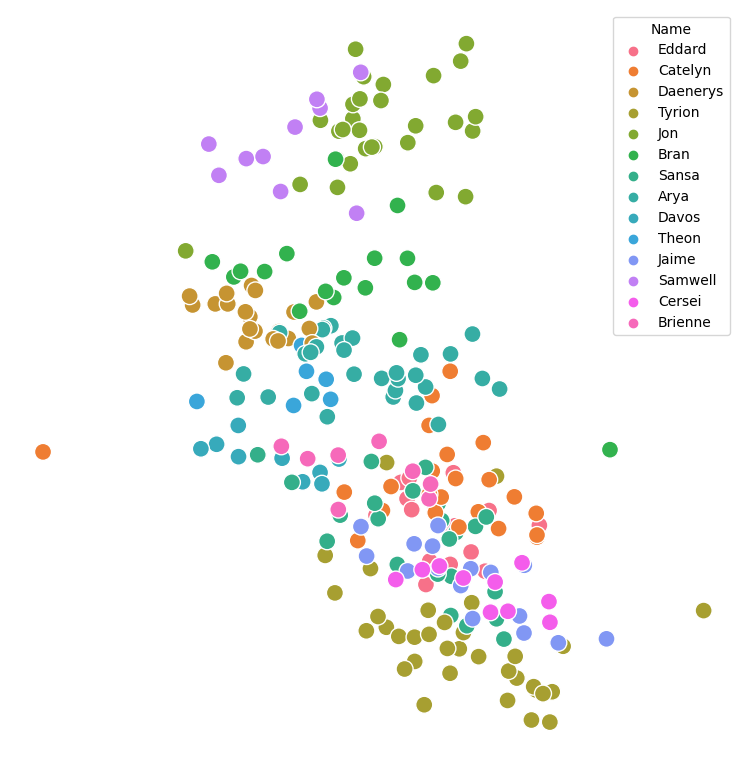

In [89]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=got.Name, s=150)
plt.tight_layout()
plt.axis('off')
plt.show()

In [90]:
# 3D viz
svd = TruncatedSVD(n_components=3)
data = svd.fit_transform(X)
scatter_x = data[:, 0]
scatter_y = data[:, 1]
scatter_z = data[:, 2]
px.scatter_3d(x=scatter_x, y=scatter_y, z=scatter_z, color=got.Name)

In [91]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto')
data = tsne.fit_transform(X)
scatter_x = data[:, 0]
scatter_y = data[:, 1]

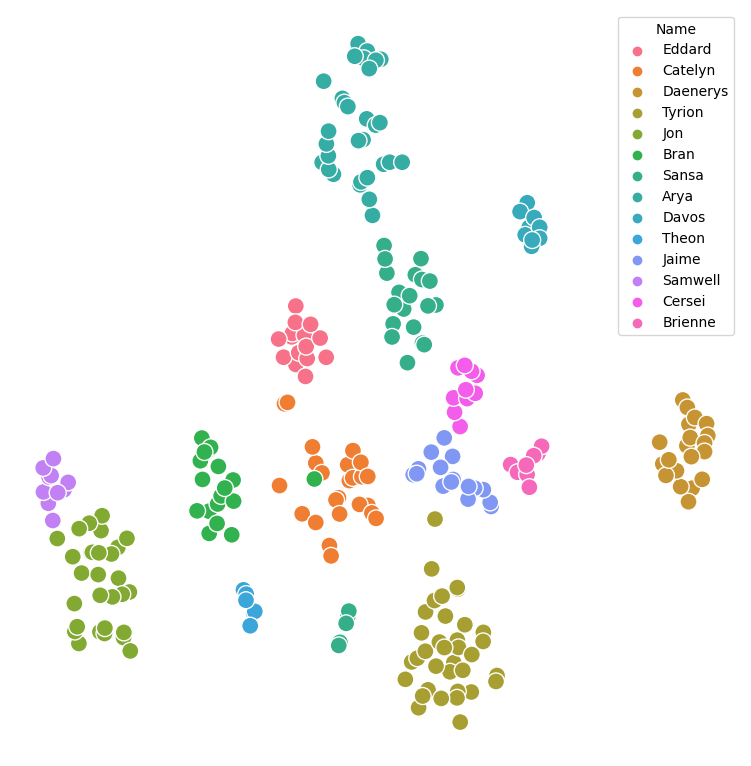

In [92]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=got.Name, s=150)
plt.tight_layout()
plt.axis('off')
plt.show()

In [93]:
# # 3D viz
tsne = TSNE(n_components=3, init='random', learning_rate='auto')
data = tsne.fit_transform(X)
scatter_x = data[:, 0]
scatter_y = data[:, 1]
scatter_z = data[:, 2]
px.scatter_3d(x=scatter_x, y=scatter_y, z=scatter_z, color=got.Name)

In [94]:
from sklearn.metrics import (rand_score, adjusted_mutual_info_score,
                             homogeneity_score, completeness_score,
                             v_measure_score, fowlkes_mallows_score)

def score_clustering(true_labels, predicted_labels):
  d = {
      "Rand index": rand_score(true_labels, predicted_labels),
      "Adjusted Mutual Info": adjusted_mutual_info_score(true_labels, predicted_labels),
      "Homogeneity": homogeneity_score(true_labels, predicted_labels),
      "Completeness": completeness_score(true_labels, predicted_labels),
      "V measure": v_measure_score(true_labels, predicted_labels),
      "Fowlkes Mallows": fowlkes_mallows_score(true_labels, predicted_labels)
  }
  for k, v in d.items():
    print(f"{k:21s}: {v}")

In [95]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(names), random_state=1)
labels_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



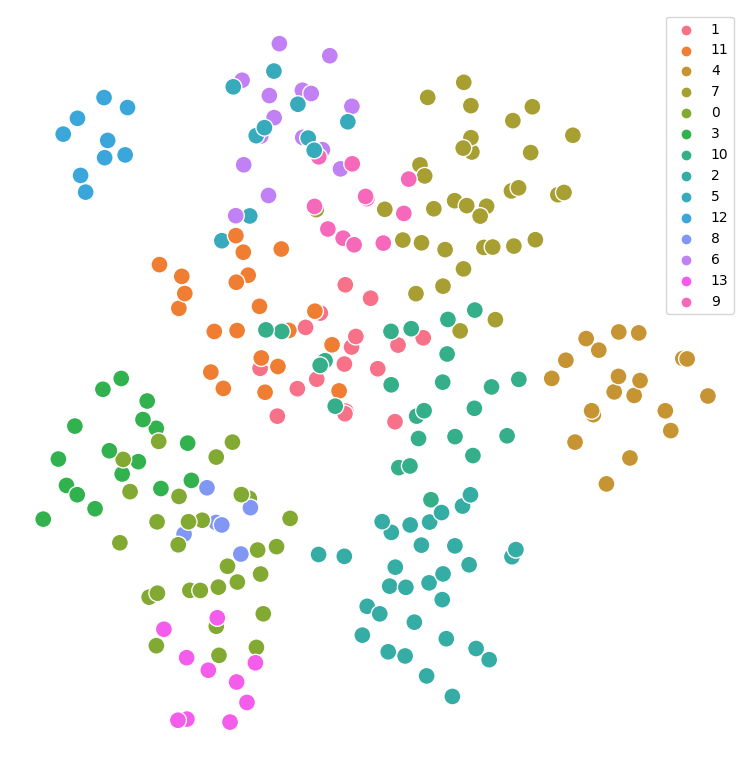

In [96]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = scatter_x, y=scatter_y, hue=labels_pred.astype(str), s=150)
plt.tight_layout()
plt.axis('off')
plt.show()

In [97]:
score_clustering(got.Name, labels_pred)

Rand index           : 0.9941176470588236
Adjusted Mutual Info : 0.9639919485176365
Homogeneity          : 0.9712364486661813
Completeness         : 0.9672494819839255
V measure            : 0.9692388652428515
Fowlkes Mallows      : 0.9651796981542199


In [98]:
from yellowbrick.cluster import KElbowVisualizer
# See https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

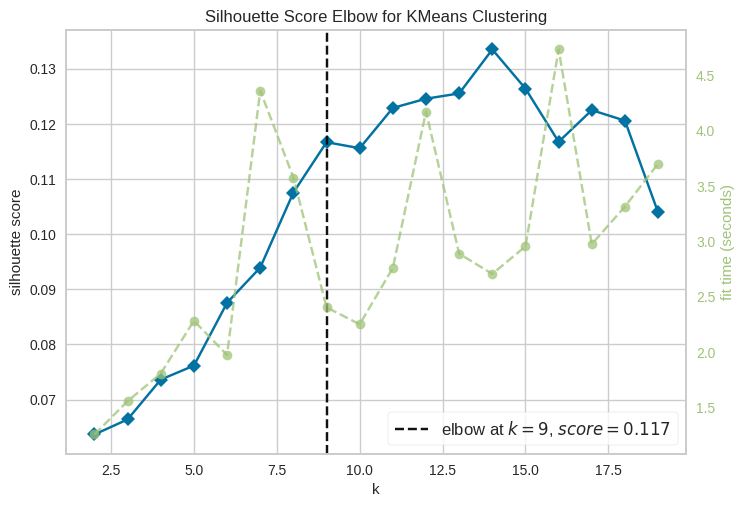

CPU times: user 1min 2s, sys: 20.8 s, total: 1min 23s
Wall time: 54.4 s


<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [99]:
%%time
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette')

visualizer.fit(X.toarray())
visualizer.show()
# This will take a while

In [100]:
visualizer.elbow_value_

9

In [101]:
kmeans = KMeans(n_clusters=visualizer.elbow_value_, random_state=1)
elbow_labels_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [102]:
score_clustering(got.Name, elbow_labels_pred)

Rand index           : 0.941421568627451
Adjusted Mutual Info : 0.8460179684139897
Homogeneity          : 0.787453689258317
Completeness         : 0.9508273370293835
V measure            : 0.8614631156510449
Fowlkes Mallows      : 0.7511879341377521


# Topic Modelling

In [103]:
!pip install pyldavis
!pip install pandas==1.5.3
!gdown 'https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

Downloading...
From: https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul
To: /content/papers.csv
100% 184M/184M [00:01<00:00, 125MB/s]


In [104]:
# Importing modules
import pandas as pd
import os
import re
from wordcloud import WordCloud


# Read data into papers
papers = pd.read_csv('/content/papers.csv')
# Print head
papers.head()

id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          paper_text  
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...  
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...  
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...  
3  Bayesian Query Construction for Neural\nNetwor...  
4  Neural Network Ensembles, Cross\nValidation, a...

In [105]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

year                                              title  \
6291  1993           Inverse Dynamics of Speech Motor Control   
5307  2015  Parallel Predictive Entropy Search for Batch G...   
3306  2010  A VLSI Implementation of the Adaptive Exponent...   
2037  2005  Maximum Margin Semi-Supervised Learning for St...   
5168  2015                   Learning with a Wasserstein Loss   

                                               abstract  \
6291                                   Abstract Missing   
5307  We develop \textit{parallel predictive entropy...   
3306  We describe an accelerated hardware neuron bei...   
2037                                   Abstract Missing   
5168  Learning to predict multi-label outputs is cha...   

                                             paper_text  
6291  Inverse Dynamics\nof Speech Motor Control\n\nM...  
5307  Parallel Predictive Entropy Search for Batch G...  
3306  A VLSI Implementation of the Adaptive Exponent...  
2037  Maximum Margin Semi-Supervised\nLearning for S...  
5168  Learning with a Wasserstein Loss\nCharlie Frog...

In [106]:
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

6291    inverse dynamics\nof speech motor control\n\nm...
5307    parallel predictive entropy search for batch g...
3306    a vlsi implementation of the adaptive exponent...
2037    maximum margin semi-supervised\nlearning for s...
5168    learning with a wasserstein loss\ncharlie frog...
Name: paper_text_processed, dtype: object

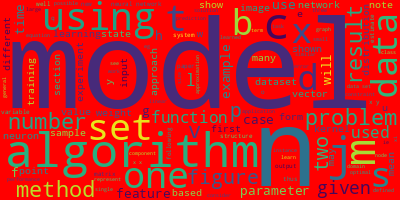

In [109]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="red", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [111]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['inverse', 'dynamics', 'speech', 'motor', 'control', 'makoto', 'hirayama', 'eric', 'vatikiotis', 'datesol', 'mitsuo', 'kawato', 'atr', 'human', 'information', 'processing', 'research', 'laboratories', 'hikaridai', 'seika', 'cho', 'soraku', 'gun', 'kyoto', 'japan', 'abstract', 'progress', 'made', 'computational', 'implementation']


In [113]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 18), (8, 2), (9, 3), (10, 1), (11, 4), (12, 1), (13, 1), (14, 4), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 5), (23, 2), (24, 3), (25, 1), (26, 1), (27, 3), (28, 1), (29, 4)]


In [114]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
for t in lda_model.print_topics():
    print(t)
doc_lda = lda_model[corpus]

(0, '0.006*"model" + 0.006*"learning" + 0.005*"data" + 0.005*"set" + 0.005*"one" + 0.004*"function" + 0.004*"kernel" + 0.004*"figure" + 0.004*"network" + 0.004*"features"')
(1, '0.010*"data" + 0.006*"learning" + 0.005*"model" + 0.004*"set" + 0.004*"number" + 0.004*"figure" + 0.004*"one" + 0.004*"algorithm" + 0.004*"two" + 0.004*"function"')
(2, '0.007*"set" + 0.006*"data" + 0.005*"learning" + 0.005*"function" + 0.004*"model" + 0.004*"features" + 0.004*"using" + 0.004*"algorithm" + 0.003*"number" + 0.003*"models"')
(3, '0.007*"model" + 0.006*"learning" + 0.005*"data" + 0.004*"time" + 0.004*"one" + 0.004*"training" + 0.004*"kernel" + 0.003*"network" + 0.003*"figure" + 0.003*"neural"')
(4, '0.006*"learning" + 0.006*"model" + 0.004*"data" + 0.004*"function" + 0.004*"using" + 0.004*"time" + 0.004*"one" + 0.004*"set" + 0.004*"neural" + 0.004*"network"')
(5, '0.008*"model" + 0.006*"data" + 0.005*"learning" + 0.005*"using" + 0.004*"two" + 0.004*"set" + 0.004*"function" + 0.004*"models" + 0.004

In [115]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis

In [116]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/content/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/content/ldavis_prepared_'+ str(num_topics) +'.html')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [117]:
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.005282 -0.002009       1        1  24.632668
1     -0.001958 -0.009000       2        1  14.146308
7      0.002898 -0.001655       3        1  13.336632
9     -0.009402  0.002549       4        1  12.136504
0      0.003209  0.001227       5        1  10.540251
3     -0.003238 -0.000515       6        1   6.504113
2      0.004605  0.005311       7        1   5.898710
5     -0.001304  0.001831       8        1   5.631916
8      0.000791 -0.002342       9        1   5.339156
4     -0.000883  0.004604      10        1   1.833742, topic_info=             Term         Freq        Total Category  logprob  loglift
348         model  1347.000000  1347.000000  Default  30.0000  30.0000
302      learning  1418.000000  1418.000000  Default  29.0000  29.0000
514           set  1045.000000  1045.000000  Default  28.0000  28.0000
622         using   852.000000   852.000000  Default  27.0000  27.0000
142          data  1488.000000  1488.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
209        figure    10.693457   824.879555  Topic10  -5.9519  -0.3468
674    algorithms     8.029594   416.582451  Topic10  -6.2384   0.0499
231         given     8.814111   583.531073  Topic10  -6.1451  -0.1939
265   information     8.128401   458.801339  Topic10  -6.2261  -0.0344
1364      results     8.300943   579.401334  Topic10  -6.2051  -0.2468

[861 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
7266       1  0.228086  abdel
7266       3  0.228086  abdel
7266       8  0.228086  abdel
12163      1  0.154938   acnn
12163      2  0.154938   acnn
...      ...       ...    ...
5966       6  0.073406     yt
5966       7  0.064230     yt
5966       8  0.100933     yt
5966       9  0.045878     yt
5966      10  0.018351     yt

[3886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 8, 10, 1, 4, 3, 6, 9, 5])

#Summarization

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
DOCUMENT = """
Italy, officially the Italian Republic (Italian: Repubblica Italiana [reˈpubblika itaˈljaːna]),[13][14] is a country consisting of a peninsula delimited by the Alps and several islands surrounding it,[15] whose territory largely coincides with the homonymous geographical region.[16] Italy is located in the centre of the Mediterranean Sea, in Southern Europe,[17][18][19] and is also considered part of Western Europe.[20][21] A unitary parliamentary republic with Rome as its capital and largest city, the country covers a total area of 301,340 km2 (116,350 sq mi) and shares land borders with France, Switzerland, Austria, Slovenia, and the enclaved microstates of Vatican City and San Marino. Italy has a territorial exclave in Switzerland (Campione) and a maritime exclave in Tunisian waters (Lampedusa). With around 60 million inhabitants, Italy is the third-most populous member state of the European Union. Due to its central geographic location in Southern Europe and the Mediterranean, Italy has historically been home to myriad peoples and cultures. In addition to the various ancient peoples dispersed throughout what is now modern-day Italy, the most predominant being the Indo-European Italic peoples who gave the peninsula its name, beginning from the classical era, Phoenicians and Carthaginians founded colonies mostly in insular Italy,[22] Greeks established settlements in the so-called Magna Graecia of Southern Italy, while Etruscans and Celts inhabited central and northern Italy respectively. An Italic tribe known as the Latins formed the Roman Kingdom in the 8th century BC, which eventually became a republic with a government of the Senate and the People. The Roman Republic initially conquered and assimilated its neighbours on the Italian peninsula, eventually expanding and conquering parts of Europe, North Africa and Asia. By the first century BC, the Roman Empire emerged as the dominant power in the Mediterranean Basin and became a leading cultural, political and religious centre, inaugurating the Pax Romana, a period of more than 200 years during which Italy's law, technology, economy, art, and literature developed.[23][24] During the Early Middle Ages, Italy endured the fall of the Western Roman Empire and barbarian invasions, but by the 11th century numerous rival city-states and maritime republics, mainly in the northern and central regions of Italy, became prosperous through trade, commerce, and banking, laying the groundwork for modern capitalism.[25] These mostly independent statelets served as Europe's main trading hubs with Asia and the Near East, often enjoying a greater degree of democracy than the larger feudal monarchies that were consolidating throughout Europe; however, part of central Italy was under the control of the theocratic Papal States, while Southern Italy remained largely feudal until the 19th century, partially as a result of a succession of Byzantine, Arab, Norman, Angevin, Aragonese, and other foreign conquests of the region.[26] The Renaissance began in Italy and spread to the rest of Europe, bringing a renewed interest in humanism, science, exploration, and art. Italian culture flourished, producing famous scholars, artists, and polymaths. During the Middle Ages, Italian explorers discovered new routes to the Far East and the New World, helping to usher in the European Age of Discovery. Nevertheless, Italy's commercial and political power significantly waned with the opening of trade routes that bypassed the Mediterranean.[27] Centuries of foreign meddling and conquest, and the rivalry and infighting between the Italian city-states, such as the Italian Wars of the 15th and 16th centuries, left Italy politically fragmented, and it was further conquered and divided among multiple foreign European powers over the centuries. By the mid-19th century, rising Italian nationalism and calls for independence from foreign control led to a period of revolutionary political upheaval. After centuries of foreign domination and political division, Italy was almost entirely unified in 1861 following a war of independence, establishing the Kingdom of Italy.[28] From the late 19th century to the early 20th century, Italy rapidly industrialised, mainly in the north, and acquired a colonial empire,[29] while the south remained largely impoverished and excluded from industrialisation, fuelling a large and influential diaspora.[30] Despite being one of the victorious allied powers in World War I, Italy entered a period of economic crisis and social turmoil, leading to the rise of the Italian fascist dictatorship in 1922. Participation in World War II on the Axis side ended in military defeat and economic destruction during the Italian campaign. Following the rise of the Italian Resistance and the liberation of Italy, the country abolished its monarchy, established a democratic Republic, enjoyed a prolonged economic boom, and became a highly developed country.[31] Italy has an advanced economy. The country is the eighth-largest by nominal GDP (third in the European Union), the sixth-largest by national wealth and the third-largest by central bank gold reserve. It ranks highly in life expectancy, quality of life,[32] healthcare,[33] and education. The country is a great power and it has a significant role in regional[34][35] and global [36][37] economic, military, cultural, and diplomatic affairs. Italy is a founding and leading member of the European Union and a member of numerous international institutions, including the United Nations, NATO, the OECD, the Organization for Security and Co-operation in Europe, the World Trade Organization, the Group of Seven, the G20, the Union for the Mediterranean, the Latin Union, the Council of Europe, Uniting for Consensus, the Schengen Area, and many more. The source of many inventions and discoveries, the country has long been a global centre of art, music, literature, philosophy, science and technology, and fashion, and has greatly influenced and contributed to diverse fields including cinema, cuisine, sports, jurisprudence, banking, and business.[38] As a reflection of its cultural wealth, Italy has the world's largest number of World Heritage Sites (58), and is the fifth-most visited country.
"""

In [ ]:

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = re.sub(r'\d+', ' ', DOCUMENT)
pattern = r'\[[^\]]*\]'
DOCUMENT = re.sub(pattern, ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()
DOCUMENT

"Italy, officially the Italian Republic (Italian: Repubblica Italiana  ),   is a country consisting of a peninsula delimited by the Alps and several islands surrounding it,  whose territory largely coincides with the homonymous geographical region.  Italy is located in the centre of the Mediterranean Sea, in Southern Europe,    and is also considered part of Western Europe.   A unitary parliamentary republic with Rome as its capital and largest city, the country covers a total area of  ,  km  ( ,  sq mi) and shares land borders with France, Switzerland, Austria, Slovenia, and the enclaved microstates of Vatican City and San Marino. Italy has a territorial exclave in Switzerland (Campione) and a maritime exclave in Tunisian waters (Lampedusa). With around   million inhabitants, Italy is the third-most populous member state of the European Union. Due to its central geographic location in Southern Europe and the Mediterranean, Italy has historically been home to myriad peoples and culture

In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)


In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['italy officially italian republic italian repubblica italiana country consisting peninsula delimited alps several islands surrounding whose territory largely coincides homonymous geographical region',
       'italy located centre mediterranean sea southern europe also considered part western europe',
       'unitary parliamentary republic rome capital largest city country covers total area km sq mi shares land borders france switzerland austria slovenia enclaved microstates vatican city san marino'],
      dtype='<U375')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(30, 30)


array([[1.   , 0.013, 0.04 , 0.012, 0.014, 0.013, 0.051, 0.033, 0.118,
        0.   , 0.016, 0.063, 0.012, 0.056, 0.038, 0.   , 0.066, 0.044,
        0.023, 0.042, 0.049, 0.046, 0.124, 0.028, 0.026, 0.   , 0.029,
        0.007, 0.019, 0.041],
       [0.013, 1.   , 0.   , 0.017, 0.02 , 0.221, 0.067, 0.   , 0.082,
        0.081, 0.074, 0.129, 0.104, 0.   , 0.   , 0.052, 0.011, 0.   ,
        0.033, 0.012, 0.014, 0.   , 0.014, 0.04 , 0.   , 0.   , 0.   ,
        0.132, 0.044, 0.017],
       [0.04 , 0.   , 1.   , 0.046, 0.   , 0.   , 0.   , 0.027, 0.027,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.062, 0.   , 0.021, 0.   , 0.024,
        0.025, 0.015, 0.071],
       [0.012, 0.017, 0.046, 1.   , 0.018, 0.016, 0.034, 0.   , 0.   ,
        0.   , 0.069, 0.016, 0.016, 0.   , 0.   , 0.   , 0.01 , 0.   ,
        0.03 , 0.011, 0.013, 0.   , 0.013, 0.037, 0.   , 0.   , 0.   ,
        0.009, 0.   , 0.016],
       [0.014, 0.02 , 0.   ,

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

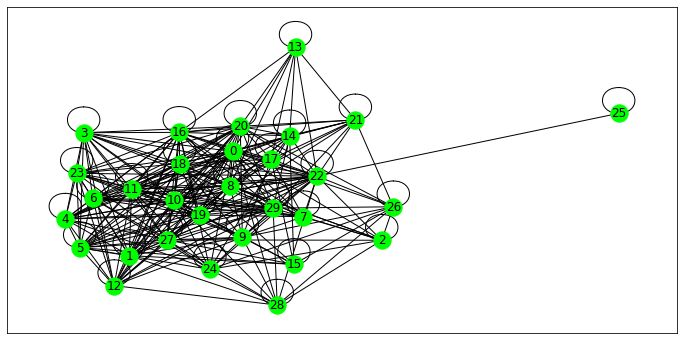

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score
                                            in scores.items()),
                          reverse=True)
ranked_sentences[:10]

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


[(0.040721209316877505, 22),
 (0.03994787372328047, 9),
 (0.03939359424138909, 10),
 (0.0375833609071944, 16),
 (0.03744652515777444, 27),
 (0.037387204944521565, 18),
 (0.03661709582201522, 1),
 (0.03563095404425751, 11),
 (0.035492104383262474, 20),
 (0.03518843307678377, 0)]

In [ ]:
num_sentences = 5

top_sentence_indices = [ranked_sentences[index][1]
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [ ]:
print('.'.join(np.array(sentences)[top_sentence_indices]))

By the first century BC, the Roman Empire emerged as the dominant power in the Mediterranean Basin and became a leading cultural, political and religious centre, inaugurating the Pax Romana, a period of more than   years during which Italy's law, technology, economy, art, and literature developed..During the Early Middle Ages, Italy endured the fall of the Western Roman Empire and barbarian invasions, but by the  th century numerous rival city-states and maritime republics, mainly in the northern and central regions of Italy, became prosperous through trade, commerce, and banking, laying the groundwork for modern capitalism..Centuries of foreign meddling and conquest, and the rivalry and infighting between the Italian city-states, such as the Italian Wars of the  th and  th centuries, left Italy politically fragmented, and it was further conquered and divided among multiple foreign European powers over the centuries..Following the rise of the Italian Resistance and the liberation of It

In [ ]:
print('.'.join(np.array(sentences)[top_sentence_indices]).replace('.', '.\n'))

By the first century BC, the Roman Empire emerged as the dominant power in the Mediterranean Basin and became a leading cultural, political and religious centre, inaugurating the Pax Romana, a period of more than   years during which Italy's law, technology, economy, art, and literature developed.
.
During the Early Middle Ages, Italy endured the fall of the Western Roman Empire and barbarian invasions, but by the  th century numerous rival city-states and maritime republics, mainly in the northern and central regions of Italy, became prosperous through trade, commerce, and banking, laying the groundwork for modern capitalism.
.
Centuries of foreign meddling and conquest, and the rivalry and infighting between the Italian city-states, such as the Italian Wars of the  th and  th centuries, left Italy politically fragmented, and it was further conquered and divided among multiple foreign European powers over the centuries.
.
Following the rise of the Italian Resistance and the liberation

# Exercise 4

# Summarization

- Use the Dataset used for topic modeling.
- Summarize all the paper using text rank algorithm.

changes:
- Try to use different number of sentences.
- Try to use different settings for TFIDF

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
nltk.download('stopwords')
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!gdown 'https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul'
papers = pd.read_csv('/content/papers.csv')
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
# Print out the first rows of papers
papers.head()

### Answer here

Downloading...
From: https://drive.google.com/uc?id=1Ase_bvYHC_B4ngJu6fDxQ5jHrwM4mvul
To: /content/papers.csv
100% 184M/184M [00:01<00:00, 139MB/s]


year  ...                                         paper_text
6276  1993  ...  Feature Densities are Required for\nComputing ...
3930  2012  ...  A Polynomial-time Form of Robust Regression\n?...
3648  2011  ...  Learning with the Weighted Trace-norm under\nA...
5614  2016  ...  Truncated Variance Reduction: A Unified Approa...
3241  2010  ...  Relaxed Clipping: A Global Training Method\nfo...

[5 rows x 4 columns]

In [ ]:
# Solution

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
normalize_corpus = np.vectorize(normalize_document)

In [ ]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.5)
vectorizer.fit(papers.paper_text)

TfidfVectorizer()

In [ ]:
def summarize_doc(DOCUMENT, num_sentences=5):
  DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
  DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
  DOCUMENT = re.sub(r'\d+', ' ', DOCUMENT)
  pattern = r'\[[^\]]*\]'
  DOCUMENT = re.sub(pattern, ' ', DOCUMENT)
  DOCUMENT = DOCUMENT.strip()
  sentences = nltk.sent_tokenize(DOCUMENT)
  norm_sentences = normalize_corpus(sentences)
  norm_sentences[:3]
  dt_matrix = vectorizer.transform(norm_sentences)
  dt_matrix = dt_matrix.toarray()
  similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
  similarity_graph = networkx.from_numpy_array(similarity_matrix)
  scores = networkx.pagerank(similarity_graph)
  ranked_sentences = sorted(((score, index) for index, score  in scores.items()),
                            reverse=True)
  top_sentence_indices = [ranked_sentences[index][1]
                          for index in range(num_sentences)]
  top_sentence_indices.sort()
  return '.'.join(np.array(sentences)[top_sentence_indices])


In [ ]:

papers['summary'] = papers.paper_text.apply(summarize_doc)

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling
/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling
/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling
/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_s

In [ ]:
print(papers.paper_text.iloc[0])

Feature Densities are Required for
Computing Feature Correspondences

Subutai Ahmad
Interval Research Corporation
1801-C Page Mill Road, Palo Alto, CA 94304
E-mail: ahmadCDinterval.com

Abstract
The feature correspondence problem is a classic hurdle in visual
object-recognition concerned with determining the correct mapping
between the features measured from the image and the features expected by the model. In this paper we show that determining good
correspondences requires information about the joint probability
density over the image features. We propose "likelihood based
correspondence matching" as a general principle for selecting optimal correspondences. The approach is applicable to non-rigid
models, allows nonlinear perspective transformations, and can optimally deal with occlusions and missing features. Experiments
with rigid and non-rigid 3D hand gesture recognition support the
theory. The likelihood based techniques show almost no decrease
in classification performance when 

In [ ]:
print(papers.summary.iloc[0].replace('.', '.\n'))

We propose "likelihood based correspondence matching" as a general principle for selecting optimal correspondences.
.
For this task we assume that during training all feature correspondences are known and that during training no feature values are noisy or missing.
.
For this task we assume that during training all feature correspondences are known and that during training no feature values are noisy or missing.
.
Missing Features and No Correspondences Figure   shows error as a function of the number of missing dimensions.
.
Feature Densities Are Required for Computing Feature Correspondences Error vs missing features without correspondence  .

